C:\Users\hameh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


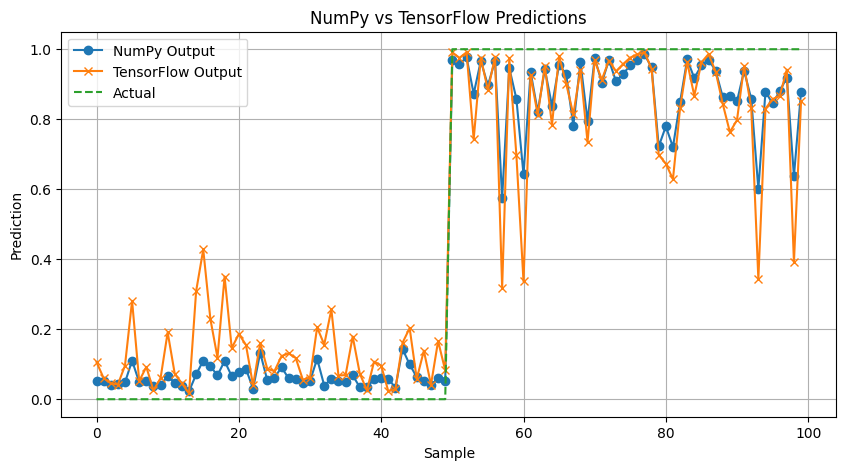

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler


iris = load_iris()
X = iris.data[:100]  
y = iris.target[:100].reshape(-1, 1)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


np.random.seed(42)
weights = np.random.randn(X.shape[1], 1)
bias = np.random.randn(1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

output_numpy = sigmoid(np.dot(X_scaled, weights) + bias)

# TensorFlow implementation
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X.shape[1],))
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(X_scaled, y, epochs=10, verbose=0)
output_tf = model.predict(X_scaled)

# Plot comparison
plt.figure(figsize=(10, 5))
plt.plot(output_numpy, label='NumPy Output', marker='o')
plt.plot(output_tf, label='TensorFlow Output', marker='x')
plt.plot(y, label='Actual', linestyle='dashed')
plt.legend()
plt.title('NumPy vs TensorFlow Predictions')
plt.xlabel('Sample')
plt.ylabel('Prediction')
plt.grid(True)
plt.show()
